# Weather Dataset

# Abstract

The main aim is to perform linear regression, logistic regression, regularization and to find interaction terms/effect if present on the weather dataset - to predict the accuracy and determine the best models using step wise regression and multi-colinearity.


### Dataset:

This notebook contains data cleaning and visualisation along with Linear and Logistic Regressions. The dataset considered here is Historical weather around Szeged,Hungary - from 2006 to 2016 : https://www.kaggle.com/budincsevity/szeged-weather/version/1

The dataset contains 12 columns with 95937 observations.

The description for the 12 features is given below:

Formatted Date : It is the date recorded for each of the day.                              
Summary : It is a categorical value which depicts the type of the day like Foggy, breezy and so on..    
Precip Type :  It is a binary column which depicts the day with either Snowfall or rainfall.                                 
Temperature (C) : It is the temperature recorded on that particular day.                                                    
Apparent Temperature (C) : It is the apparent temperature recorded on that particular day in degree celsius.                   
Humidity : It is the humidity value recorded on a particular day.                                                     
Wind Speed (km/h) : It is the wind speed recorded in km/h.                                                           
Wind Bearing (degrees): It is the wind bearing in degrees on a day.                                                       
Visibility (km) : It is the visibility in km on a particular day.                                                      
Loud Cover : It is the feature which describes whether the sky is clear or covered with clouds.                                 
Pressure (millibars) : It is the atmospheric air pressure ie., force per unit area in millibars.                              
Daily Summary : It is the type of the day depicted with values like foggy,cloudy, rainy or breezy and so on..           

### Methods Used:

Linear model                      
Logistic model                           
Multi-colinearity and step-wise regression                                  
Interaction effects                  
Regularization             

### Conclusion :

On performing Linear and Logistic regression the best models was predicted with highest accuracy and R squared and adjusted R squared values.

## Importing required libraries


In [422]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels as stats
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from statsmodels.formula.api import ols
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression # to perform linear regression
from sklearn.linear_model import LinearRegression # to perform logistci regression
from sklearn.metrics import classification_report
import statsmodels.api as sm
from sklearn import linear_model # Scikit learn library that implements generalized linear models
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # To encode categorical variables
from sklearn.model_selection import train_test_split # To split train and test dataset
from statsmodels.stats.outliers_influence import variance_inflation_factor # to check multicolinearity
from sklearn.model_selection import cross_val_score # To perform cross validation

## Loading the Dataset using Pandas Libraries

In [423]:
data = pd.read_csv('weatherHistory.csv')

# Exploratory Data Analysis

In [424]:
# displays the first five records/observations from the dataset
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [425]:
# display sthe last five records from the data set
data.tail()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


In [426]:
# gives us the data type of each column, null or not null in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [427]:
# to describe the total number of entries and total number of columns
data.shape

(96453, 12)

In [428]:
#check for missing data, and output columns that have missing data
for col in data:
    if (data[col].isnull().any()):
        print(col)

Precip Type


In [429]:
# Checking for null values and returning boolean value
data.isnull().any()

Formatted Date              False
Summary                     False
Precip Type                  True
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Loud Cover                  False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

In [430]:
# to drop the null values
data = data.dropna()

In [431]:
#cross checking for null values
data.isnull().any()

Formatted Date              False
Summary                     False
Precip Type                 False
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Loud Cover                  False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

In [432]:
#summary stats on each of the numeric columns
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.0,95936.000000
mean,11.940976,10.862531,0.734841,10.804936,187.518773,10.362402,0.0,1003.150038
std,9.570671,10.717812,0.195724,6.920727,107.385351,4.173780,0.0,117.276976
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.604167,2.276389,0.600000,5.796000,116.000000,8.372000,0.0,1011.890000
50%,12.033333,12.033333,0.780000,9.933700,180.000000,10.046400,0.0,1016.420000
75%,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,0.0,1021.050000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [433]:
#check all the statistics
data.describe(include='all')

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,95936,95936,95936,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.0,95936.000000,95936
unique,95912,27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214
top,2010-08-02 17:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,2,31635,85224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20020
mean,NaN,NaN,NaN,11.940976,10.862531,0.734841,10.804936,187.518773,10.362402,0.0,1003.150038,NaN
std,NaN,NaN,NaN,9.570671,10.717812,0.195724,6.920727,107.385351,4.173780,0.0,117.276976,NaN
min,NaN,NaN,NaN,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,4.604167,2.276389,0.600000,5.796000,116.000000,8.372000,0.0,1011.890000,NaN
50%,NaN,NaN,NaN,12.033333,12.033333,0.780000,9.933700,180.000000,10.046400,0.0,1016.420000,NaN
75%,NaN,NaN,NaN,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,0.0,1021.050000,NaN


In [434]:
#check categorical data
data.describe(include=['O'])

,Formatted Date,Summary,Precip Type,Daily Summary
count,95936,95936,95936,95936
unique,95912,27,2,214
top,2010-08-02 17:00:00.000 +0200,Partly Cloudy,rain,Mostly cloudy throughout the day.
freq,2,31635,85224,20020


In [435]:
#dropping this column as it is of no use in this complete analysis
data = data.drop('Loud Cover',axis = 1)

In [436]:
#check columns
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [437]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


# Handling categorical values

In [438]:
#checking for categorical values
data['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [439]:
#creating dummy values
data['Precip Type']=data['Precip Type'].str.replace('Snow','Snowfall', case=False)
data['Precip Type']=data['Precip Type'].str.replace('Rain','Rainfall', case=False)

In [440]:
#dropping previous values
data=pd.get_dummies(data,columns=['Precip Type'], drop_first= True)

In [441]:
data.columns

Index(['Formatted Date', 'Summary', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary', 'Precip Type_Snowfall'],
      dtype='object')

In [442]:
#checking the count of values for categorical values
data['Summary'].value_counts()

Partly Cloudy                          31635
Mostly Cloudy                          27914
Overcast                               16516
Clear                                  10763
Foggy                                   7117
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Windy and Mostly Cloudy                   35
Breezy and Foggy                          35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [443]:
# to check count of the distinct categories within the feature 
print(data['Summary'].value_counts().count())

27


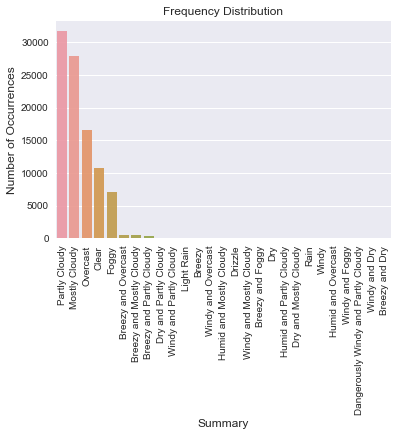

In [444]:
#plotting categorical values using a bar plots
carrier_count = data['Summary'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Summary', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [445]:
#handling categorical values groupin it under "others" column
data["Summary"]=np.where(data["Summary"].isin(['Breezy and Overcast','Breezy and Mostly Cloudy','Breezy and Partly Cloudy','Dry and Partly Cloudy',
'Windy and Partly Cloudy','Light Rain','Breezy','Windy and Overcast','Humid and Mostly Cloudy','Drizzle','Breezy and Foggy','Windy and Mostly Cloudy','Dry','Humid and Partly Cloudy','Dry and Mostly Cloudy','Rain','Windy','Humid and Overcast',
'Windy and Foggy','Breezy and Dry','Dangerously Windy and Partly Cloudy','Windy and Dry']),"Others",data["Summary"])
#data["Summary"]=np.where(data["Summary"]="Mostly Cloudy","Others",data["Summary"])
#data["Summary"]=np.where(data["Summary"]="Overcast","Others",data["Summary"])
#data["Summary"]=np.where(data["Summary"]="Clear","Others",data["Summary"])
#data["Summary"]=np.where(data["Summary"]="Foggy","Others",data["Summary"])

In [446]:
#checking if the values are all grouped under column "others"
data["Summary"].value_counts()

Partly Cloudy    31635
Mostly Cloudy    27914
Overcast         16516
Clear            10763
Foggy             7117
Others            1991
Name: Summary, dtype: int64

In [447]:
#creating dummies variables and dropping the initial column - Summary
data=pd.get_dummies(data,columns=['Summary'], drop_first= True)

Dummy variables (also known as an indicator variable, design variable, Boolean indicator, categorical variable, binary variable, or qualitative variable) is one that takes the value 0 or 1 to indicate the absence or presence of some categorical effect that may be expected to shift the outcome

In [448]:
# cross checking the count of values for categorical values
data.columns

Index(['Formatted Date', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Pressure (millibars)', 'Daily Summary',
       'Precip Type_Snowfall', 'Summary_Foggy', 'Summary_Mostly Cloudy',
       'Summary_Others', 'Summary_Overcast', 'Summary_Partly Cloudy'],
      dtype='object')

In [449]:
#correlation between variables
data.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type_Snowfall,Summary_Foggy,Summary_Mostly Cloudy,Summary_Others,Summary_Overcast,Summary_Partly Cloudy
Temperature (C),1.000000,0.992637,-0.632148,0.008304,0.029937,0.393719,-0.005253,-0.563503,-0.310437,0.046225,-0.009439,-0.211532,0.300242
Apparent Temperature (C),0.992637,1.000000,-0.602390,-0.057387,0.028951,0.382589,-0.000037,-0.566058,-0.292961,0.045561,-0.030935,-0.216620,0.297419
Humidity,-0.632148,-0.602390,1.000000,-0.224569,0.000814,-0.370511,0.005375,0.232622,0.312506,-0.031679,-0.063202,0.239445,-0.309874
Wind Speed (km/h),0.008304,-0.057387,-0.224569,1.000000,0.104366,0.100801,-0.049453,-0.067771,-0.148718,0.055248,0.421418,0.080466,-0.070561
Wind Bearing (degrees),0.029937,0.028951,0.000814,0.104366,1.000000,0.048900,-0.011629,-0.042142,-0.049201,0.027994,0.054237,-0.016621,0.016422
Visibility (km),0.393719,0.382589,-0.370511,0.100801,0.048900,1.000000,0.061011,-0.316483,-0.597414,0.117192,0.010984,-0.119702,0.244970
Pressure (millibars),-0.005253,-0.000037,0.005375,-0.049453,-0.011629,0.061011,1.000000,0.009271,0.010288,0.041744,-0.022050,0.009493,0.059333
Precip Type_Snowfall,-0.563503,-0.566058,0.232622,-0.067771,-0.042142,-0.316483,0.009271,1.000000,0.276235,-0.089686,-0.020967,0.066266,-0.127585
Summary_Foggy,-0.310437,-0.292961,0.312506,-0.148718,-0.049201,-0.597414,0.010288,0.276235,1.000000,-0.181335,-0.041209,-0.129087,-0.198550
Summary_Mostly Cloudy,0.046225,0.045561,-0.031679,0.055248,0.027994,0.117192,0.041744,-0.089686,-0.181335,1.000000,-0.093258,-0.292128,-0.449326


In [450]:
data.head()

,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Precip Type_Snowfall,Summary_Foggy,Summary_Mostly Cloudy,Summary_Others,Summary_Overcast,Summary_Partly Cloudy
0,2006-04-01 00:00:00.000 +0200,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,0,0,0,0,0,1
1,2006-04-01 01:00:00.000 +0200,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,0,0,0,0,0,1
2,2006-04-01 02:00:00.000 +0200,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,0,0,1,0,0,0
3,2006-04-01 03:00:00.000 +0200,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,0,0,0,0,0,1
4,2006-04-01 04:00:00.000 +0200,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,0,0,1,0,0,0


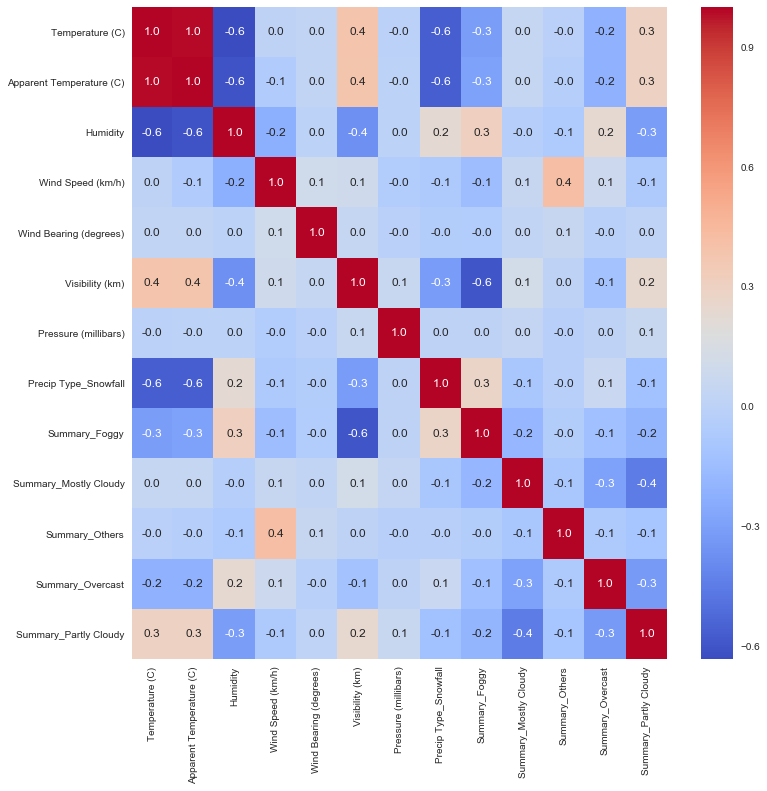

In [451]:
#plotting heatmap a correlation matrix 
#setting the size of the figure to 16,12
plt.figure(figsize=(12,12))
#plotting a heatmap using seaborn library for the sample dataset, setting annot value to true as to write the data value
#in each cell
sns.heatmap(data.iloc[:,1:].corr(),annot=True,fmt='.1f',cmap='coolwarm')
plt.show()

# Linear Regression

Target Variable - Temperature

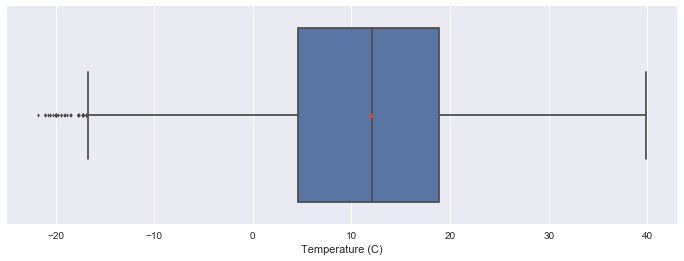

In [766]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'Temperature (C)', data = data, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
plt.show()

From this we understand that there are a few outliers towards the left of the first quartile range or minimum values with the mean at approximately 12 and interquartile range of 19-5.

Linear regression is used for finding linear relationship between target and one or more predictors. One is predictor or independent variable and other is response or dependent variable.The core idea is to obtain a line that best fits the data. The best fit line is the one for which total prediction error (all data points) are as small as possible. Error is the distance between the point to the regression line.

## Model 1

Considering many independent variables - 'Wind Speed (km/h)','Visibility (km)','Summary_Partly Cloudy','Summary_Overcast','Humidity','Precip Type_Snowfall', 'Summary_Foggy','Summary_Others' having the highest positive correlation values from the dataset 

In [453]:
data.columns

Index(['Formatted Date', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Pressure (millibars)', 'Daily Summary',
       'Precip Type_Snowfall', 'Summary_Foggy', 'Summary_Mostly Cloudy',
       'Summary_Others', 'Summary_Overcast', 'Summary_Partly Cloudy'],
      dtype='object')

In [524]:
# Store independent and dependent variable in X, Y respectively
X = data[['Wind Speed (km/h)','Visibility (km)','Summary_Partly Cloudy','Summary_Overcast','Humidity','Precip Type_Snowfall', 'Summary_Foggy','Summary_Others']]
Y = data[['Temperature (C)']]

In [525]:
# Split dataset into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [526]:
# Fitting the training set into simple linear regression
regressor = linear_model.LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [527]:
print(regressor.intercept_)
print(regressor.coef_)

[32.36111266]
[[ -0.19742779   0.13820134   1.07051376  -0.59593908 -25.21314624
  -12.85717095  -0.32619741   0.86762078]]


In [528]:
# Predicting the test set results
pred = regressor.predict(X_test)

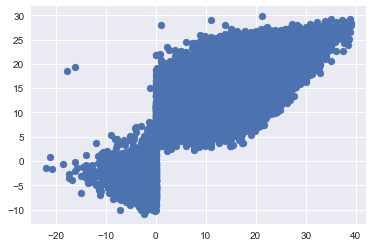

In [529]:
plt.scatter(Y_test,pred)

In [530]:
#Our model needs an intercept so we add a column of it
X = sm.add_constant(X)

In [531]:
# Statistical data exploration
model = sm.OLS(Y,X).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:        Temperature (C)   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                 1.890e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        14:52:03   Log-Likelihood:            -3.0743e+05
No. Observations:               95936   AIC:                         6.149e+05
Df Residuals:                   95927   BIC:                         6.150e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    32.42

Observation -

The value of R-square and adjusted R-square is 0.612 and the p-value for the predictors are highly significant with 0.00 values which means these variables are great predictors of temperature.Humidity and Precip Type_Snowfall are the bets predictors in the model follwed by the rets of the predcitors.

In [532]:
# Print the coefficients
print('Parameters: ', model.params)
print('R2: ', model.rsquared)

Parameters:  const                    32.421350
Wind Speed (km/h)        -0.198588
Visibility (km)           0.141252
Summary_Partly Cloudy     1.068258
Summary_Overcast         -0.612626
Humidity                -25.319148
Precip Type_Snowfall    -12.833911
Summary_Foggy            -0.318273
Summary_Others            0.820106
dtype: float64
R2:  0.6118207836100285


In [533]:
#Applying K-fold cross validation
from sklearn.model_selection import cross_val_score # To perform cross validation
score = cross_val_score(regressor,X_test,Y_test, cv = 5)
print('accuracy:' +str(score.mean()*100))
print('Mean Score:' + str(score.mean()))
print('Variance Score:' + str(score.std()))

accuracy:61.78703062715438
Mean Score:0.6178703062715438
Variance Score:0.0036372570810799688


K-fold cross validation is a simple, intuitive way to estimate prediction error. K-Folds Cross Validation we split our data into k different subsets (or folds). We use k-1 subsets to train our data and leave the last subset (or the last fold) as test data. We then average the model against each of the folds and then finalize our model. After that we test it against the test set..

The accuracy of the model here is 61.78%.

## Model 2

On removing Summary_Foggy from the above model based on the least t scores - 3.250...

Performing backward elimination - Stepwise regression in predicting the target variable - Temperature

In [534]:
# Store independent and dependent variable in X, Y respectively
X = data[['Wind Speed (km/h)','Visibility (km)','Summary_Partly Cloudy','Summary_Overcast','Humidity','Precip Type_Snowfall','Summary_Others']]
Y = data[['Temperature (C)']]

In [535]:
# Split dataset into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


In [536]:
# Fitting the training set into simple linear regression
regressor = linear_model.LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

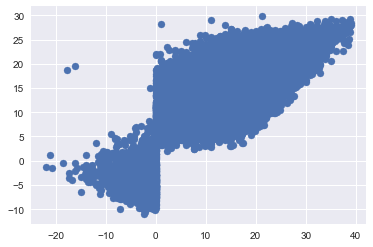

In [537]:
# Predicting the test set results
pred = regressor.predict(X_test)
plt.scatter(Y_test,pred)

In [538]:
#Our model needs an intercept so we add a column of it
X = sm.add_constant(X)

In [539]:
# Statistical data exploration
model = sm.OLS(Y,X).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:        Temperature (C)   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                 2.160e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        14:52:43   Log-Likelihood:            -3.0743e+05
No. Observations:               95936   AIC:                         6.149e+05
Df Residuals:                   95928   BIC:                         6.150e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    32.30

Observation -                                                                

From the above model, the values of R squared and adjusted R squared remains the same from the previous models along wit the AIC and BIC values there is no much of impact on removing the predictor "Summary_Foggy". The predictors still have quite significant p values and are still good predictors of the target variable temperature.Humidity and Precip Type_Snowfall still remains the best predictor for the target variable Temperature followed by the remaining variables.

In [540]:
# Print the coefficients
print('Parameters: ', model.params)
print('R2: ', model.rsquared)

Parameters:  const                    32.305244
Wind Speed (km/h)        -0.198183
Visibility (km)           0.151816
Summary_Partly Cloudy     1.088345
Summary_Overcast         -0.554835
Humidity                -25.368147
Precip Type_Snowfall    -12.855611
Summary_Others            0.844188
dtype: float64
R2:  0.6117780441530946


In [541]:
#Applying K-fold cross validation
score = cross_val_score(regressor, X_test,Y_test, cv = 5)
print('Accuracy :' + str(score.mean()*100))
print('Mean Score:' + str(score.mean()))
print('Variance Score:' + str(score.std()))

Accuracy :61.78402388884881
Mean Score:0.617840238888488
Variance Score:0.0036328279354116873


The accuracy of the model has not changed from the previous model even after removing one of the predictor on the basis of t score values.

## Model 3

On removing Summary_Others predictor having the least t score from the above model..

In [613]:
# Store independent and dependent variable in X, Y respectively
X = data[['Wind Speed (km/h)','Visibility (km)','Summary_Partly Cloudy','Humidity','Precip Type_Snowfall','Summary_Overcast']]
Y = data[['Temperature (C)']]

In [614]:
# Split dataset into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [615]:
# Fitting the training set into simple linear regression
regressor = linear_model.LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [616]:

print(regressor.intercept_)
print(regressor.coef_)

[32.17961161]
[[ -0.18896939   0.14863185   1.06282254 -25.24101386 -12.88220657
   -0.58565905]]


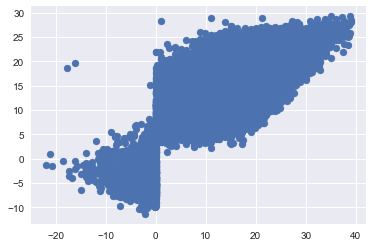

In [617]:
# Predicting the test set results
pred = regressor.predict(X_test)
plt.scatter(Y_test,pred)

In [618]:
#Our model needs an intercept so we add a column of it
X = sm.add_constant(X)


In [619]:
# Statistical data exploration
model = sm.OLS(Y,X).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:        Temperature (C)   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                 2.518e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:22:59   Log-Likelihood:            -3.0745e+05
No. Observations:               95936   AIC:                         6.149e+05
Df Residuals:                   95929   BIC:                         6.150e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    32.24

Observation -
From the table although the p value is quite significant but the value of R squared and adjusted R square still remains the same - 0.612 with same values of AIC and BIC from the previous models.. humidity, Precip Type_Snowfall, Wind Speed still continue to predict the temperature follwed by the rets of the predictors and Summary_Overcast having the least T score the least predictor.

In [620]:

# Print the coefficients
print('Parameters: ', model.params)
print('R2: ', model.rsquared)
print(regressor.intercept_)
print(regressor.coef_)

Parameters:  const                    32.247983
Wind Speed (km/h)        -0.190638
Visibility (km)           0.151394
Summary_Partly Cloudy     1.061514
Humidity                -25.348137
Precip Type_Snowfall    -12.858518
Summary_Overcast         -0.600697
dtype: float64
R2:  0.611651713819251
[32.17961161]
[[ -0.18896939   0.14863185   1.06282254 -25.24101386 -12.88220657
   -0.58565905]]


In [622]:
#Applying K-fold cross validation
score = cross_val_score(regressor, X_test,Y_test, cv = 5)
print('Accuracy:' + str(score.mean()*100))
print('Mean Score:' + str(score.mean()))
print('Variance Score:' + str(score.std()))

Accuracy:61.781796400119426
Mean Score:0.6178179640011943
Variance Score:0.0036491442938086736


Observation : The accuracy of the score has decreased a little minutely from 61.78% to 61.38% with same AIC,BIC, R squared and adjusted R sqaured values...

Trying to improve the model by eliminating the feature based on least t score - Summary_Overcast

In [624]:
#On removing the Humidity from the above model..
X = data[['Wind Speed (km/h)','Visibility (km)','Precip Type_Snowfall','Summary_Partly Cloudy','Humidity']]
Y = data[['Temperature (C)']]

# Split dataset into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Create a linear regression object
reg = linear_model.LinearRegression()
regressor.fit(X_train, Y_train)

# Statistical data exploration
model4 = sm.OLS(Y,X).fit()
print (model4.summary())

                            OLS Regression Results                            
Dep. Variable:        Temperature (C)   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                 5.489e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:23:19   Log-Likelihood:            -3.3305e+05
No. Observations:               95936   AIC:                         6.661e+05
Df Residuals:                   95931   BIC:                         6.662e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Wind Speed (km/h)         0.11

In [625]:
#Applying K-fold cross validation
score = cross_val_score(regressor, X_test,Y_test, cv = 5)  
print('Accuracy:' + str(score.mean()*100))
print('Mean Score:' + str(score.mean()))
print('Variance Score:' + str(score.std()))

Accuracy:61.72340889595851
Mean Score:0.6172340889595851
Variance Score:0.0036981562503076767


Observation -

From the above table, we see that the values of R squared and adjusted R squared have increased significantly with accuracy values being 61.723 (minute difference with previous value). Hence we use this feature with the best predictors being humidity, Precip Type_Snowfall and Summary_Partly Cloudy

# Interaction Effects

## Model 1

An interaction variable is a variable constructed from an original set of variables to try to represent either all of the interaction present or some part of it. An interaction variable models the simultaneous influence of two predictors on a third response variable is not additive. We want to know whether the joint effect is higher than the sum of both effects. An an interaction may arise when considering the relationship among three or more variables, and describes a situation in which the simultaneous influence of two variables on a third is not additive.

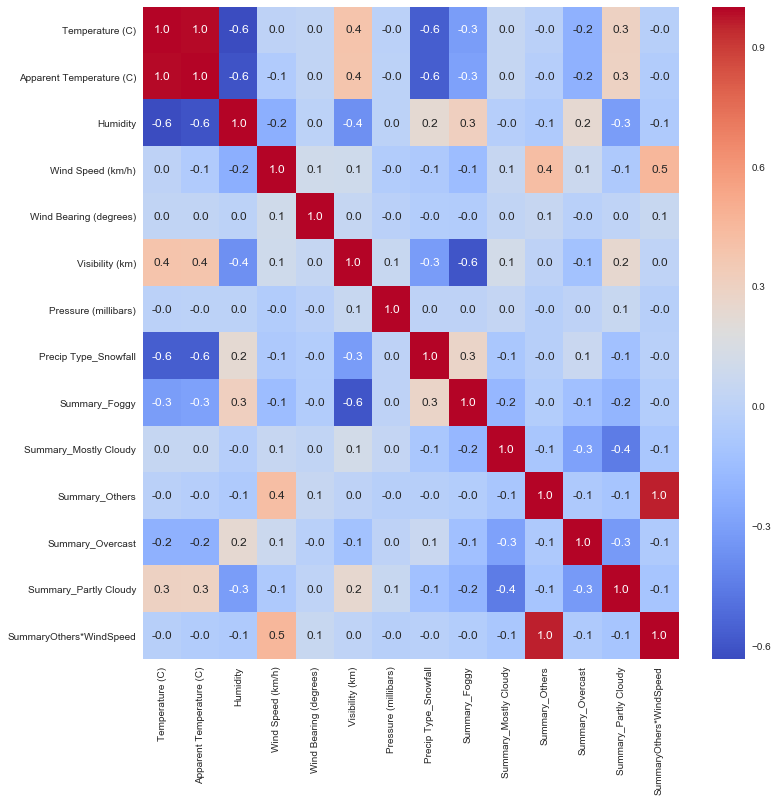

In [600]:
#plotting heatmap a correlation matrix 
#setting the size of the figure to 16,12
plt.figure(figsize=(12,12))
#plotting a heatmap using seaborn library for the sample dataset, setting annot value to true as to write the data value
#in each cell
sns.heatmap(data.iloc[:,1:].corr(),annot=True,fmt='.1f',cmap='coolwarm')
plt.show()

In [601]:
data["SummaryOthers*WindSpeed"]=data['Summary_Others']*data['Wind Speed (km/h)']

We earlier saw that Summary Others alone does not have a significant effect on Temperature based on its low t score and we had eliminated this feature. But it has a combined effect with Windspeed on temperature. Let us now remove Wind speed as feature and include the interaction term 'SummaryOthers*WindSpeed' in our model and check its impact on the score.

In [626]:
X = data[['SummaryOthers*WindSpeed','Visibility (km)','Summary_Partly Cloudy','Humidity','Precip Type_Snowfall','Summary_Overcast']]
Y = data[['Temperature (C)']]

In [627]:
# Split dataset into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [628]:
# Create a linear regression object
reg = linear_model.LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [629]:
result = sm.OLS(Y,X).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:        Temperature (C)   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                 4.515e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:25:06   Log-Likelihood:            -3.3351e+05
No. Observations:               95936   AIC:                         6.670e+05
Df Residuals:                   95930   BIC:                         6.671e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
SummaryOthers*WindSpeed   

In [630]:
#Applying K-fold cross validation
score = cross_val_score(regressor , X_test ,Y_test, cv = 5)  
print('Accuracy Score:' + str(score.mean()*100))
print('Mean Score:' + str(score.mean()))
print('Variance Score:' + str(score.std()))

Accuracy Score:60.295422718382376
Mean Score:0.6029542271838237
Variance Score:0.00597089321322439


Observation -
On adding this interaction term, we see that the combined interaction effect of wind speed and summary others decreased the score to 60.29% although there is increase in the  R squared and adjusted R squared values. The value of AIC, BIC also increases. This means it gave us poor results meaning there is not a significant synergy effect in these features.

## Model 2

In [631]:
data["SummaryFoggy*Precip Type_Snowfall"] = data['Summary_Foggy']*data['Precip Type_Snowfall']

We earlier saw that Summary Foggy alone does not have a significant effect on Temperature. But it has a combined effect with Precip Type_Snowfall' on temperature. Let us now remove Wind speed as feature and include the interaction term "SummaryFoggy*Precip Type_Snowfall" in our model and check its impact on the score.

In [632]:
X = data[['Wind Speed (km/h)','Visibility (km)','Summary_Partly Cloudy','SummaryFoggy*Precip Type_Snowfall','Summary_Overcast']]
Y = data[['Temperature (C)']]

In [636]:
# Split dataset into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [637]:
# Fitting the training set into simple linear regression
regressor = linear_model.LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [638]:
result = sm.OLS(Y,X).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:        Temperature (C)   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                 4.284e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:26:45   Log-Likelihood:            -3.4156e+05
No. Observations:               95936   AIC:                         6.831e+05
Df Residuals:                   95931   BIC:                         6.832e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Wind S

In [639]:
#Applying K-fold cross validation
score = cross_val_score(regressor , X_test ,Y_test, cv = 5)  
print('Accuracy Score:' + str(score.mean()*100))
print('Mean Score:' + str(score.mean()))
print('Variance Score:' + str(score.std()))

Accuracy Score:23.836064989570648
Mean Score:0.2383606498957065
Variance Score:0.00997700464861998


Obseravtion -
On adding this interaction term, we see that the combined interaction effect of wind speed and summary others decreased the score to 23.83% although the values of R squared and adjusted R squared increased to 0.691. The value of AIC, BIC also increases. This means it gave us poor results meaning there is not a significant synergy effect in these features.

# Part B : Logistic Regression

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X. The activation function that is used is known as the sigmoid function.

## Model 1 

Considering the target Variable as "Precip Type_Snowfall" as the target variable as it is the binary categorical column in the dataset. 

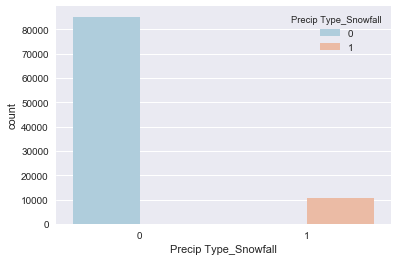

In [642]:
sns.countplot(x='Precip Type_Snowfall',data=data,hue='Precip Type_Snowfall',palette = 'RdBu_r')

In [643]:
data.columns

Index(['Formatted Date', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Pressure (millibars)', 'Daily Summary',
       'Precip Type_Snowfall', 'Summary_Foggy', 'Summary_Mostly Cloudy',
       'Summary_Others', 'Summary_Overcast', 'Summary_Partly Cloudy',
       'SummaryOthers*WindSpeed', 'SummaryFoggy*Precip Type_Snowfall'],
      dtype='object')

Considering almost all the varibles in the dataset and performing backward elimination ...

## Stepwise regression

Stepwise regression means to iteratively select the best predictor (that improves the model the most), then the next best until we have no predictors that improves the model or use all of the predictors. This is also called forward stepwise selection.

A variant called backward elimination, involves starting with all candidate predictors, testing the deletion of each variable using a chosen model comparison criterion, deleting the variable (if any) that improves the model the most by being deleted, and repeating this process until no further improvement is possible.

Bidirectional elimination, a combination of the above, testing at each step for variables to be included or excluded.

In [645]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
X=data[['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)','Visibility (km)', 'Pressure (millibars)','Summary_Foggy', 'Summary_Mostly Cloudy','Summary_Others', 'Summary_Overcast', 'Summary_Partly Cloudy']]
Y = data[['Precip Type_Snowfall']]

In [646]:
#splitting test set and train set
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [648]:
# instantiate logistic regression object and train on training data
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

print("Training set score: {:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test,y_test)))

Training set score: 0.887
Test set score: 0.884


In [650]:
# let us fit a logit regression model to get the coefficients
logit_model = sm.Logit(y_train,X_train)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                            Logit Regression Results                            
Dep. Variable:     Precip Type_Snowfall   No. Observations:                76748
Model:                            Logit   Df Residuals:                    76738
Method:                             MLE   Df Model:                            9
Date:                  Mon, 25 Feb 2019   Pseudo R-squ.:                     inf
Time:                          15:34:00   Log-Likelihood:                   -inf
converged:                         True   LL-Null:                        0.0000
                                          LLR p-value:                     1.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Humidity                   1.3316      0.067     19.757      0.000       

Observation:                                                          
Looking at the z scores, we know that, Humidity is the most significant feature to predict the temperature and since Wind Speed (km/h) has p score of 0.172 and also z scores of 1.367 we are not keeping this feature as it is least significant predictor and hence removing this feature.

In [653]:
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(X_test)

Confusion Matrix: It is nothing but a tabular representation of Actual vs Predicted values and gives us a matrix as output and describes the complete performance of the model This helps us to find the accuracy of the model and avoid overfitting.

In [656]:
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[16864,   162],
       [ 2068,    94]], dtype=int64)

                           Predicted values
                 [True Positive]    [False Negative]                                                                                   
                 [False Positive]    [True Negative]                                                                                                                              

16864 values of true positives wherein the actual and the predicted values are correct and matches.


In [658]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.89      0.99      0.94     17026
          1       0.37      0.04      0.08      2162

avg / total       0.83      0.88      0.84     19188



Classification report that shows the precision, recall, F1, and support scores for the model.                            
Precision is the ability of a classiifer not to label an instance positive that is actually negative.                        
Recall is the ability of a classifier to find all positive instances.                                                     
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.          
Support is the number of actual occurrences of the class in the specified dataset. 

Observation -                                             
From the below report we see that 17026 samples predict 0 as the output and 2162 predict 1 as the output.

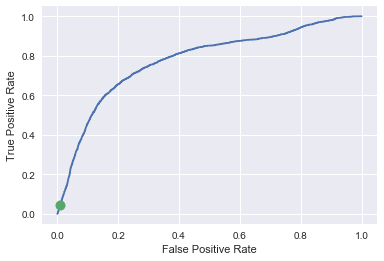

In [659]:
# plotting a roc curve to get the auc
from sklearn.metrics import roc_curve
falsepos,truepos,thresholds = roc_curve(y_test,logreg.decision_function(X_test))  
# to predict confidence scores for samples
plt.plot(falsepos,truepos,label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

cutoff = np.argmin(np.abs(thresholds))
plt.plot(falsepos[cutoff],truepos[cutoff],'o',markersize=10,label="cutoff",fillstyle="full")
plt.show()

Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems.

The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

In [684]:
from sklearn import metrics

logistic_auc = metrics.auc(falsepos, truepos)
print("AUC for logistic regression model :", logistic_auc) 

AUC for logistic regression model : 0.7919766395260097


Here, AUC is relatively close to 1 and greater than 0.5 suggesting some skill in prediction

In [685]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.887


The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values.


In [665]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 27.491244527829895
Mean Squared Error: 0.11621846987700646
Root Mean Squared Error: 0.3409083012732404


# Model 2

On removing the feature,Wind Speed (km/h) from the above model...

In [668]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
X=data[['Humidity', 'Wind Bearing (degrees)','Visibility (km)', 'Pressure (millibars)','Summary_Foggy', 'Summary_Mostly Cloudy','Summary_Others', 'Summary_Overcast', 'Summary_Partly Cloudy']]
Y = data[['Precip Type_Snowfall']]

In [669]:
#splitting test set and train set
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [670]:
# instantiate logistic regression object and train on training data
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [671]:
print("Training set score: {:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test,y_test)))

Training set score: 0.887
Test set score: 0.885


In [672]:
# let us fit a logit regression model to get the coefficients
logit_model = sm.Logit(y_train,X_train)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                            Logit Regression Results                            
Dep. Variable:     Precip Type_Snowfall   No. Observations:                76748
Model:                            Logit   Df Residuals:                    76739
Method:                             MLE   Df Model:                            8
Date:                  Mon, 25 Feb 2019   Pseudo R-squ.:                     inf
Time:                          16:12:44   Log-Likelihood:                   -inf
converged:                         True   LL-Null:                        0.0000
                                          LLR p-value:                     1.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Humidity                   1.3338      0.067     19.814      0.000       


Observations:

Looking at the z scores, we know that, Visibility (Km) is the most significant feature to predict the temperature price followed by the rest.Cosidering the z scores Pressure(millibars) being the least significant feature we will eliminate this feature from the above model.

In [674]:
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(X_test)

In [675]:
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[16933,    93],
       [ 2118,    44]], dtype=int64)

In [676]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.89      0.99      0.94     17026
          1       0.32      0.02      0.04      2162

avg / total       0.82      0.88      0.84     19188



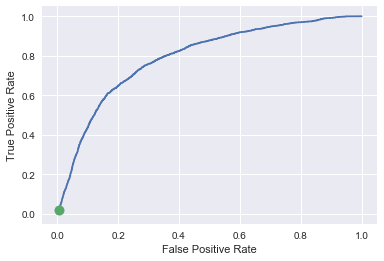

In [678]:
# plotting a roc curve to get the auc
from sklearn.metrics import roc_curve
falsepos,truepos,thresholds = roc_curve(y_test,logreg.decision_function(X_test))
# to predict confidence scores for samples

plt.plot(falsepos,truepos,label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

cutoff = np.argmin(np.abs(thresholds))
plt.plot(falsepos[cutoff],truepos[cutoff],'o',markersize=10,label="cutoff",fillstyle="full")
plt.show()

In [679]:
from sklearn import metrics

logistic_auc = metrics.auc(falsepos, truepos)
print("AUC for logistic regression model :", logistic_auc)

AUC for logistic regression model : 0.7919766395260097


In [680]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.887


Obseravtion - 

The accuracy of the model still remains the same as that of the previous model - 0.887

In [683]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 28.152126328955596
Mean Squared Error: 0.11522826766729206
Root Mean Squared Error: 0.33945289462205513


The root mean squared error in this model is the same as that of the previous model.

## Model 3

### Checking for Multi - colinearity

Checking for multicollinaerity amongst the variables - Lets now calculate the Variance Inflation Factor (VIF) for the above variables to know if there exists a multicolinearity amongst them.

# Multi-colinearity

Multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. In this situation the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data. Multicollinearity does not reduce the predictive power or reliability of the model as a whole, at least within the sample data set; it only affects calculations regarding individual predictors.

In [702]:
X=data[['Humidity', 'Wind Bearing (degrees)','Pressure (millibars)','Visibility (km)','Summary_Foggy', 'Summary_Mostly Cloudy','Summary_Others', 'Summary_Overcast', 'Summary_Partly Cloudy']]

In [703]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(1)

,VIF Factor,features
0,15.8,Humidity
1,4.0,Wind Bearing (degrees)
2,33.6,Pressure (millibars)
3,11.0,Visibility (km)
4,2.4,Summary_Foggy
5,3.6,Summary_Mostly Cloudy
6,1.2,Summary_Others
7,2.7,Summary_Overcast
8,4.0,Summary_Partly Cloudy


From the above values which are much greater than the threshold value of 5, it proves that these variables have multicolinearity amongst them. Hence, we should discard these variables before moving on to model building with high multicolinearity such as Visibilty,Pressure (millibars) and Humidity.Considering only the values with values less than threshold value of 5 for building third model for logistic regression.

In [704]:
X=data[['Wind Bearing (degrees)','Summary_Foggy', 'Summary_Mostly Cloudy','Summary_Others', 'Summary_Overcast', 'Summary_Partly Cloudy']]
Y = data[['Precip Type_Snowfall']]

In [705]:
#splitting test set and train set
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [706]:
# instantiate logistic regression object and train on training data
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [707]:
print("Training set score: {:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test,y_test)))

Training set score: 0.889
Test set score: 0.887


In [709]:
# let us fit a logit regression model to get the coefficients
logit_model = sm.Logit(y_train,X_train)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                            Logit Regression Results                            
Dep. Variable:     Precip Type_Snowfall   No. Observations:                76748
Model:                            Logit   Df Residuals:                    76742
Method:                             MLE   Df Model:                            5
Date:                  Mon, 25 Feb 2019   Pseudo R-squ.:                     inf
Time:                          16:29:53   Log-Likelihood:                   -inf
converged:                         True   LL-Null:                        0.0000
                                          LLR p-value:                     1.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Wind Bearing (degrees)    -0.0041   8.67e-05    -47.700      0.000      -

Observation:

Looking at the z scores, we knoo that Summary_Partly Cloudy  is the most significant feature to predict the temperature followed by the rest.

In [710]:
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(X_test)

In [711]:
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[17026,     0],
       [ 2162,     0]], dtype=int64)

In [712]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.89      1.00      0.94     17026
          1       0.00      0.00      0.00      2162

avg / total       0.79      0.89      0.83     19188



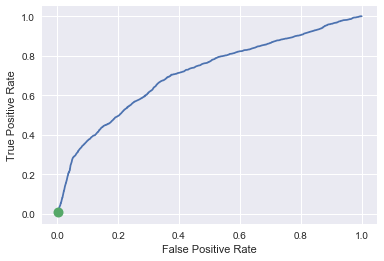

In [713]:
# plotting a roc curve to get the auc
from sklearn.metrics import roc_curve
falsepos,truepos,thresholds = roc_curve(y_test,logreg.decision_function(X_test))  # to predict confidence scores for samples

plt.plot(falsepos,truepos,label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

cutoff = np.argmin(np.abs(thresholds))
plt.plot(falsepos[cutoff],truepos[cutoff],'o',markersize=10,label="cutoff",fillstyle="full")
plt.show()

In [714]:
from sklearn import metrics

logistic_auc = metrics.auc(falsepos, truepos)
print("AUC for logistic regression model :", logistic_auc)

AUC for logistic regression model : 0.7086119471411901


In [715]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.889


# Regularization

Regularization is a method for "constraining" or "regularizing" the size of the coefficients, thus "shrinking" them towards zero.It reduces model variance which minimizes overfitting.

Techniques:

Ridge: It is majorly used to prevent overfitting.ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity

Lasso: Lasso regression not only helps in reducing over-fitting but it can help us in feature selection

In [731]:
data.columns

Index(['Formatted Date', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Pressure (millibars)', 'Daily Summary',
       'Precip Type_Snowfall', 'Summary_Foggy', 'Summary_Mostly Cloudy',
       'Summary_Others', 'Summary_Overcast', 'Summary_Partly Cloudy',
       'SummaryOthers*WindSpeed', 'SummaryFoggy*Precip Type_Snowfall'],
      dtype='object')

In [732]:
# Store independent and dependent variable in X, Y respectively
X = data[['Wind Speed (km/h)','Visibility (km)','Summary_Partly Cloudy','Humidity','Precip Type_Snowfall','Summary_Overcast']]
Y = data[['Temperature (C)']]

#splitting test set and train set
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

Fitting the training set to linear regression

In [734]:
# Fitting linear regression to training set
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [735]:
accuracy = cross_val_score(estimator=lr, X=X_test, y=y_test, cv=5)
accuracy.mean()*100

61.781796400119426

The accuracy of the model before we perform ridge regression is - 61.78.

### Ridge regression

In [772]:
# Fitting regression to training set
#higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely restricted and in this case 
#linear and ridge regression resembles
rr = linear_model.Ridge(alpha=0.01, normalize=True) 
rr.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

1. A tiny alpha imposes no penalty on the coefficient size, and is equivalent to a normal linear regression model.     
2. Increasing the alpha penalizes the coefficients and thus shrinks them.                          
Lower the constraint on the features, the model will resemble linear regression model

In [773]:
accuracy = cross_val_score(estimator=rr, X=X_test, y=y_test, cv=5)
accuracy.mean()*100

61.77721986274199

The accuracy after we perform ridge is the same as before - 61.77% with lower values of alpha such as 0.01.

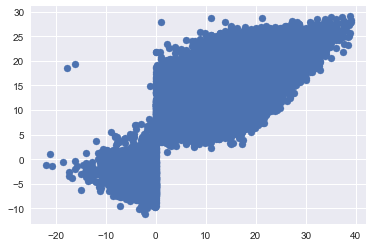

In [774]:
y_pred = rr.predict(X_test)
plt.scatter(y_test,y_pred)

In [775]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

5.905971860264869

#### Trying with different values of alpha -- 

In [778]:
#Fitting regression to training set with higher values of alpha - 10
rr = linear_model.Ridge(alpha=10, normalize=True) 
rr.fit(X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [779]:
accuracy = cross_val_score(estimator=rr, X=X_test, y=y_test, cv=5)
accuracy.mean()*100

15.791600316611893

The accuracy value decreases to 15.7916 from 61.78 with alpha value = 10, this is an example of shrinking coefficient magnitude using Ridge regression.

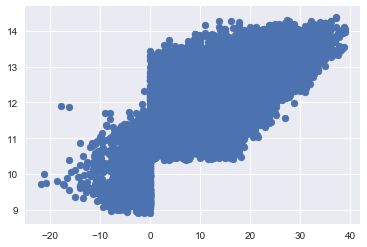

In [783]:
y_pred = rr.predict(X_test)
plt.scatter(y_test,y_pred)

In [784]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

8.771608408259333

# Conclusion

1. On performing Linear Regression (Step wise - backward elimination) on the weather dataset  - model 4 is the best so far with accuracy of 61.78% and R squared & adjusted R squared values - 0.741 and "Humidity", "Precip Type_Snowfall" and "Summary_Partlycloudy" being the best predictors in determining the target variable : Temperature.
2. With Logistic Regression on the dataset (Step wise - backward elimination and multicolinearity) - model 3 is the best so far with accuracy of 88.9% in predciting the binary target variable - Precip Type_Snowfall.
3. Performed Ridge regularization technique with different values of alpha to observe the change in accuracy.
when alpha = 0.01, then accuracy = 61.7%
when alpha = 10 , then accuracy = 15.79% (on fitting both alpha values in Linear Regression )
4. Performed linear regression with assumption of the predictors multiplying the effect or best predicting the response variable
but with decrease in accuracy it proves that it has no synergy effect and thus that particualr feature was eliminated.

# Contributions :

1. Performed data cleaning by checking for null values and replacing them with placeholder values along with EDA.
2. Added necessary comments, required observations after every results and explanations to the code.
3. Performed Linear Regression by considering the variables using the correlation function and tried to improve the accuracy of the model
4. Performed Logistic Regression by selecting variables after checking for existence of multicolinearity by VIF method
5. Performed Ridge regularization technique on the variables with different values of alpha.
6. Performed backward elimination on all the models to increase the accuracy.



Personal contribution: 35%                                                     
External references: 65%

# Citations

1. https://github.com/nikbearbrown/INFO_6105/blob/master/Week_2/NBB_Linear_Regression.ipynb        
2. https://github.com/nikbearbrown/INFO_6105/blob/master/Week_2/NBB_Logistic_Regression.ipynb
3. https://www.kaggle.com/budincsevity/szeged-weather/version/1                                                                  
4. https://towardsdatascience.com/data-science-simplified-simple-linear-regression-models-3a97811a6a3d                            
5. Logistic Regression : http://www.michaeljgrogan.com/statsmodels-sklearn-linear-regression/
6. Linear Regression : https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86
7. Regularization :https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b
8. https://github.com/nikbearbrown/INFO_6105/blob/master/Week_2/NBB_Regularization.ipynb

# LICENSE

Copyright 2019, Chaitanya Prasanna Kumar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.